# Fake Job Prediction

#### Group member names: Faraz Ahmed (200547626) and Fareed Shahid (200551973)

### INTRODUCTION:
#### AIM : 
A Comparative Study on Fake Job Post Prediction using Different Data mining Techniques

*********************************************************************************************************************
#### Github Repo:

*********************************************************************************************************************
#### DESCRIPTION OF PAPER: 
This study investigates the detection of fake job postings using various classification algorithms, including KNN, decision trees, support vector machines, and deep neural networks (DNNs). Using the Employment Scam Aegean Dataset (EMSCAD) with 18,000 samples, the research found that a DNN with three dense layers achieved approximately 98% accuracy in predicting fraudulent job posts. The findings highlight the effectiveness of DNNs in addressing the issue of fake job postings in the digital era.

*********************************************************************************************************************
#### PROBLEM STATEMENT : 
The rise of online job advertisements has led to an increase in fraudulent job postings, causing job seekers to waste time and compromise their personal information. This has eroded trust in online job opportunities. There is a need for an automated system to effectively identify and filter out fake job posts, ensuring a secure and reliable recruitment process.

*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
*The problem arises from the increase in fraudulent job postings on online platforms, driven by technological growth and social media. These scams waste job seekers' time and erode trust in online job opportunities. The need is for automated systems that can effectively detect and eliminate these fake postings, ensuring a secure recruitment process.
*********************************************************************************************************************
#### SOLUTION:
*We have used different Machine Learning and Artificial Intelligence methodolies to better discern if the job posting is real or a scam.

# Importing all the necessary libraries that we will be needing in the entire process.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, roc_curve, auc, ndcg_score
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.utils import resample

# Loading our dataset that is stored locally on our machine.

In [3]:
df = pd.read_csv("C:\\Users\\fzzrx\\Downloads\\fake_job_postings.csv")

# Cleaning the data and handling missing values.

In [4]:
df.dropna(subset=['description', 'fraudulent'], inplace=True)

In [5]:
# Assuming you have a 'description' column for job text and a 'fraudulent' column for labels
X = df['description'].astype(str)  # Convert to string to handle potential NaN values
y = df['fraudulent']


# Splitting the dataset into training, validation and testing sets.

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
# Print the shape of the training, validation, and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (12515,) (12515,)
Validation set shape: (2682,) (2682,)
Testing set shape: (2682,) (2682,)


# Creating dataframes for all the splits that we made of the dataset.

In [8]:
split_data = {
    'Dataset': ['Training', 'Validation', 'Testing'],
    'Samples': [len(X_train), len(X_val), len(X_test)]
}
split_df = pd.DataFrame(split_data)


# Plotting different datasets to visualize their sizes.

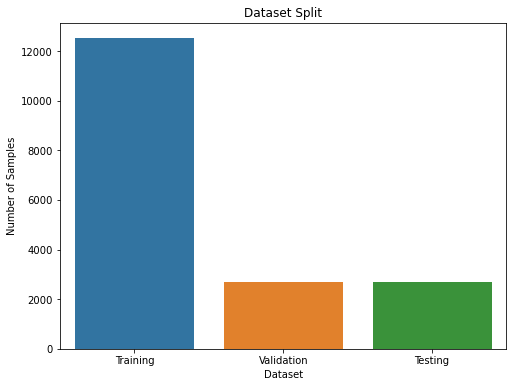

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Dataset', y='Samples', data=split_df)
plt.title('Dataset Split')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.show()


# Exploratory data analysis.

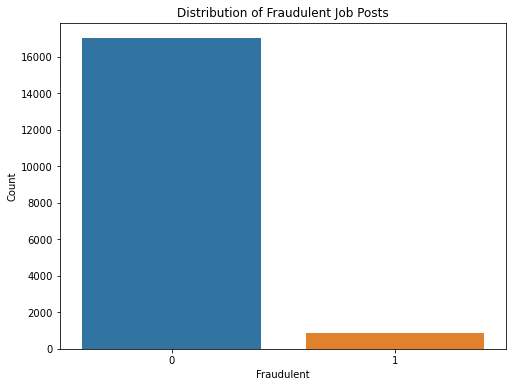

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent Job Posts')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

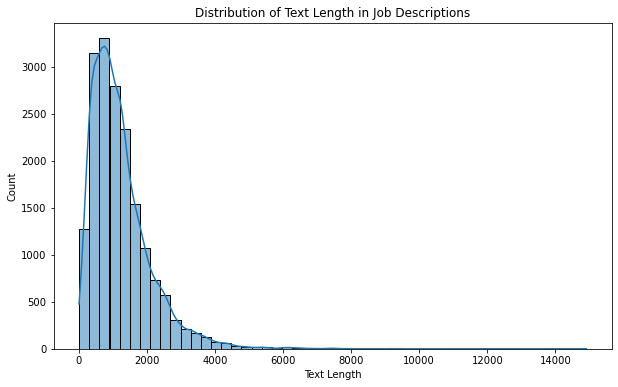

In [16]:
# Visualize the distribution of text lengths in job descriptions
df['text_length'] = df['description'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length in Job Descriptions')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

# Feature engineering.

In [17]:
df['num_words'] = df['description'].apply(lambda x: len(str(x).split()))

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Step 2: Instantiate the CountVectorizer or TfidfVectorizer for text features
vectorizer = TfidfVectorizer()  # Consider using TfidfVectorizer for better representation of text features


In [19]:
# Step 3: Convert text data to lowercase, tokenize, and vectorize
X_train_lower = [doc.lower() if isinstance(doc, str) else str(doc).lower() for doc in X_train]
X_train_lower = np.array(X_train_lower)

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train_lower)

# Transform the validation and testing data using the fitted vectorizer
X_val_lower = [doc.lower() if isinstance(doc, str) else str(doc).lower() for doc in X_val]
X_test_lower = [doc.lower() if isinstance(doc, str) else str(doc).lower() for doc in X_test]
X_val_vectorized = vectorizer.transform(X_val_lower)
X_test_vectorized = vectorizer.transform(X_test_lower)

# Training the model on our data.

In [20]:
# Step 6: Model Training
# Instantiate the classification models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)  # Set probability=True for later ROC curve
logistic_regression = LogisticRegression()


In [21]:
# Train the models using the vectorized training data
decision_tree.fit(X_train_vectorized, y_train)
random_forest.fit(X_train_vectorized, y_train)
svm.fit(X_train_vectorized, y_train)
logistic_regression.fit(X_train_vectorized, y_train)

LogisticRegression()

# Evaluating the model.

In [22]:
models = [decision_tree, random_forest, svm, logistic_regression]

for model in models:
    y_pred_val = model.predict(X_val_vectorized)
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)
    confusion_mat = confusion_matrix(y_val, y_pred_val)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)
    print()

Model: DecisionTreeClassifier
Accuracy: 0.9698, Precision: 0.6667, Recall: 0.6612, F1 Score: 0.6639
Confusion Matrix:
[[2521   40]
 [  41   80]]

Model: RandomForestClassifier
Accuracy: 0.9802, Precision: 1.0000, Recall: 0.5620, F1 Score: 0.7196
Confusion Matrix:
[[2561    0]
 [  53   68]]

Model: SVC
Accuracy: 0.9795, Precision: 1.0000, Recall: 0.5455, F1 Score: 0.7059
Confusion Matrix:
[[2561    0]
 [  55   66]]

Model: LogisticRegression
Accuracy: 0.9676, Precision: 1.0000, Recall: 0.2810, F1 Score: 0.4387
Confusion Matrix:
[[2561    0]
 [  87   34]]



Model: DecisionTreeClassifier
Accuracy: 0.9698, Precision: 0.6667, Recall: 0.6612
Confusion Matrix:
[[2521   40]
 [  41   80]]


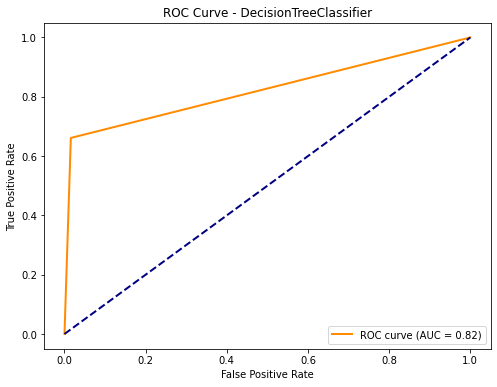


Model: RandomForestClassifier
Accuracy: 0.9802, Precision: 1.0000, Recall: 0.5620
Confusion Matrix:
[[2561    0]
 [  53   68]]


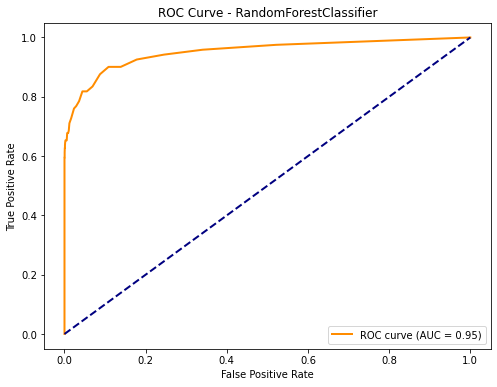


Model: SVC
Accuracy: 0.9795, Precision: 1.0000, Recall: 0.5455
Confusion Matrix:
[[2561    0]
 [  55   66]]


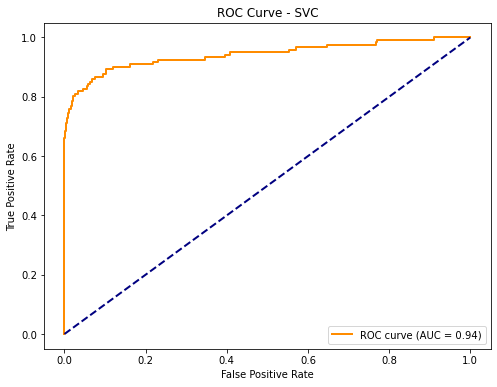


Model: LogisticRegression
Accuracy: 0.9676, Precision: 1.0000, Recall: 0.2810
Confusion Matrix:
[[2561    0]
 [  87   34]]


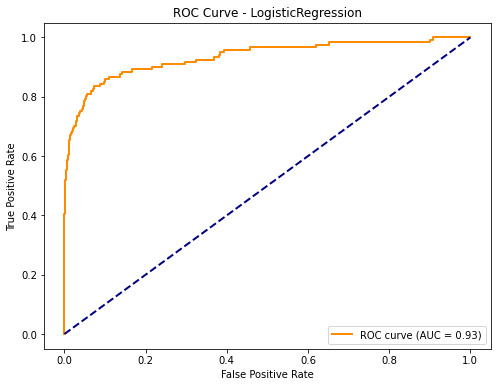

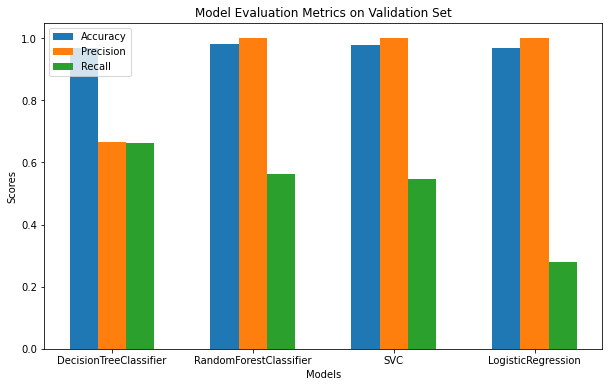

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Step 7: Model Evaluation (on Validation Set)
models = [decision_tree, random_forest, svm, logistic_regression]

accuracy_scores = []
precision_scores = []
recall_scores = []

for model in models:
    y_pred_val = model.predict(X_val_vectorized)
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    confusion_mat = confusion_matrix(y_val, y_pred_val)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val_vectorized)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model.__class__.__name__}')
    plt.legend(loc='lower right')
    plt.show()

    print()

# Plot Bar Graph
labels = [model.__class__.__name__ for model in models]
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracy_scores, width, label='Accuracy')
plt.bar(x, precision_scores, width, label='Precision')
plt.bar(x + width, recall_scores, width, label='Recall')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics on Validation Set')
plt.xticks(x, labels)
plt.legend()
plt.show()


# Visualizing the confusion matrix.

Model: DecisionTreeClassifier
Confusion Matrix:
[[2521   40]
 [  41   80]]


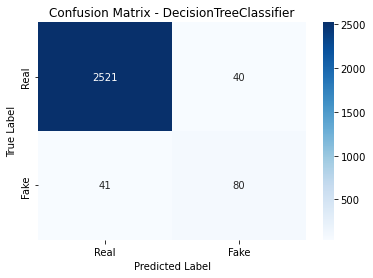


Model: RandomForestClassifier
Confusion Matrix:
[[2561    0]
 [  53   68]]


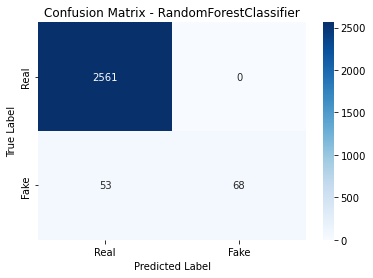


Model: SVC
Confusion Matrix:
[[2561    0]
 [  55   66]]


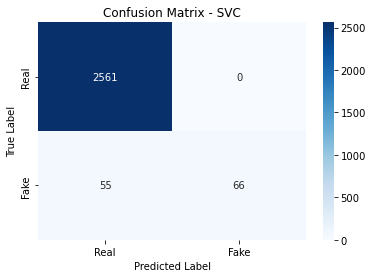


Model: LogisticRegression
Confusion Matrix:
[[2561    0]
 [  87   34]]


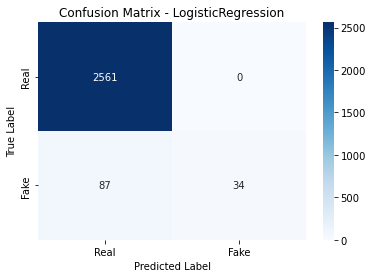

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of real and fake predictions for each model
for model in models:
    y_pred_val = model.predict(X_val_vectorized)
    confusion_mat = confusion_matrix(y_val, y_pred_val)

    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_mat)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print()


# Evaluating model on the test set.

In [25]:
models = [decision_tree, random_forest, svm, logistic_regression]

for model in models:
    y_pred_test = model.predict(X_test_vectorized)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Final Testing Accuracy ({model.__class__.__name__}): {test_accuracy:.4f}")

Final Testing Accuracy (DecisionTreeClassifier): 0.9679
Final Testing Accuracy (RandomForestClassifier): 0.9776
Final Testing Accuracy (SVC): 0.9746
Final Testing Accuracy (LogisticRegression): 0.9638


# Deep neural network implementation.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Load your dataset
df = pd.read_csv("C:\\Users\\fzzrx\\Downloads\\fake_job_postings.csv")

# Assuming you have a 'description' column for job text and a 'fraudulent' column for labels
X = df['description'].astype(str)  # Convert to string to handle potential NaN values
y = df['fraudulent']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train.astype(str))  # Make sure all values are strings
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=200, truncating='post', padding='post')

# Perform the same preprocessing for the test set
X_test_sequences = tokenizer.texts_to_sequences(X_test.astype(str))
X_test_padded = pad_sequences(X_test_sequences, maxlen=200, truncating='post', padding='post')


In [31]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Define the deep learning model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=200))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


D:\Applications\Anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 225ms/step - accuracy: 0.9292 - loss: 0.2844 - val_accuracy: 0.9493 - val_loss: 0.2004
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 216ms/step - accuracy: 0.9542 - loss: 0.1864 - val_accuracy: 0.9493 - val_loss: 0.2007
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 193ms/step - accuracy: 0.9498 - loss: 0.1966 - val_accuracy: 0.9493 - val_loss: 0.1984
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 196ms/step - accuracy: 0.9528 - loss: 0.1835 - val_accuracy: 0.9507 - val_loss: 0.1976
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 192ms/step - accuracy: 0.9578 - loss: 0.1596 - val_accuracy: 0.9542 - val_loss: 0.1817
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9537 - loss: 0.1808

Test Loss: 0.18440239131450653
Test Accuracy: 0.952740490436554


# Results and observations.

112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step
Confusion Matrix:
[[3393    2]
 [ 167   14]]


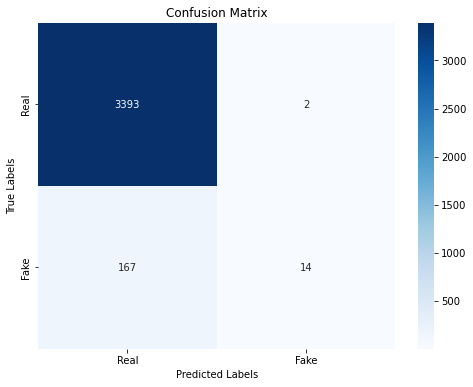

In [32]:
y_pred_prob = model.predict(X_test_padded)

# Apply a threshold to get binary predictions
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


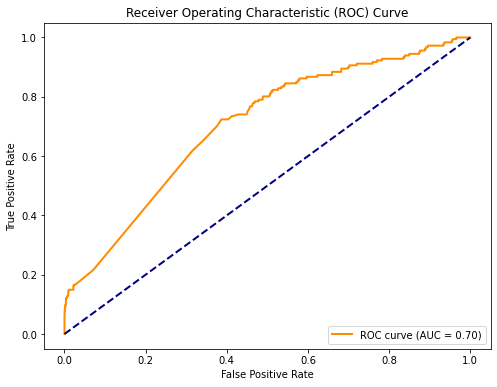

In [33]:
from sklearn.metrics import roc_curve, auc

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_padded)

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




### Conclusion and Future Direction :
*******************************************************************************************************************************
#### Learnings -
The research reports the highest classification accuracy for the Random Forest Classifier among traditional machine learning algorithms. The DNN model achieves a 99% accuracy for specific folds, with an average classification accuracy of 97.7% across 10 folds. The paper highlights the importance of considering precision and recall, especially in a class-unbalanced dataset.

*******************************************************************************************************************************
#### Results Discussio -
:The paper evaluates the performance of the models using various metrics. For traditional machine learning algorithms, metrics such as classification accuracy, precision, recall, and F1 score are considered. For the DNN model, accuracy, precision, and recall are analyzed for each fold. The paper emphasizes the importance of assessing the model's performance on a class-imbalanced dataset and considers precision and recall in addition to accuracy.


*******************************************************************************************************************************
#### Limitatio -
:The implementation faces challenges related to the class imbalance in the dataset. The use of precision and recall is emphasized to address this issue. Additionally, a dropout layer is introduced in the DNN model to reduce overfitting and improve generalization.


*******************************************************************************************************************************
#### Future Extens -
We can experiment using more dropout layers in our neural network to get better and more accurate results. We can also use different optimizers to make the process faster on our machines. :
